In [2]:
import pandas as pd
import numpy as np
#pip install palmerpenguins
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt

In [3]:
penguins = load_penguins()
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [4]:
attributeNames = np.asarray(penguins.columns) #headers (attribute names)
print(penguins.shape)
print(attributeNames)

(344, 8)
['species' 'island' 'bill_length_mm' 'bill_depth_mm' 'flipper_length_mm'
 'body_mass_g' 'sex' 'year']


In [5]:
# Inspect the data
print(penguins.to_string())

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex  year
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    male  2007
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  female  2007
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  female  2007
3       Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN  2007
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  female  2007
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    male  2007
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  female  2007
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    male  2007
8       Adelie  Torgersen            34.1           18.1              193

Only problem seems to be the Nans, those objects (rows) will now be deleted.

# 1 - Start removing Nans and making a visual inspection

(333, 8)
(344, 8)
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex  year
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    male  2007
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  female  2007
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  female  2007
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  female  2007
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    male  2007
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  female  2007
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    male  2007
12      Adelie  Torgersen            41.1           17.6              182.0       3200.0  female  2007
13      Adelie  Torgersen            38.6           21.

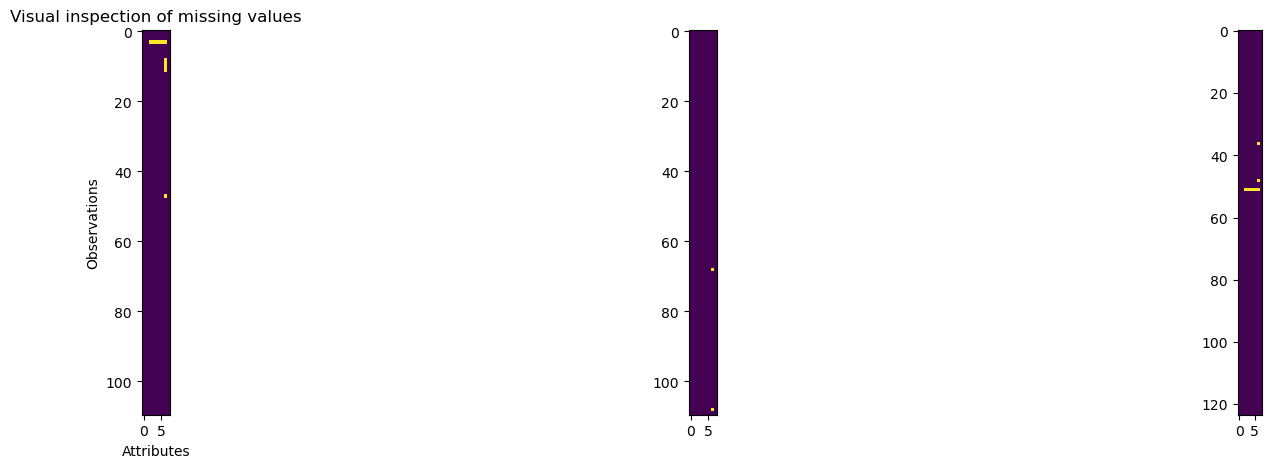

In [6]:
## Missing values - visual inspection
# Missing float values
#nan_float=penguins.iloc[:, [2,3,4,5,7]]
#print(penguins.isnull().sum())
missing_idx=penguins.isnull()
obs_row_missing = np.sum(missing_idx, 1) > 0  #axis 1 is rows
obs_drop_missing = penguins.iloc[np.logical_not(obs_row_missing).values,:]
print(obs_drop_missing.shape)
print(penguins.shape)
#print(nan_float.isnull().sum())
#missing_idx = np.isnan(penguins[:,aux].values)

print(obs_drop_missing.to_string())


# Another approach is to first investigate where the missing values are.
# A quick way to do this is to visually look at the missing_idx:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Visual inspection of missing values')
plt.imshow(missing_idx.iloc[:110,:])
plt.ylabel('Observations'); plt.xlabel('Attributes')
plt.subplot(1,3,2)
plt.imshow(missing_idx.iloc[110:220,:])
plt.subplot(1,3,3)
plt.imshow(missing_idx.iloc[220:,:])

plt.show()

# 2 - One hot encoding
Still not finished -> need to use the penguins without nans **************************************************************************** \
Sexes's encoding halfway.\
May automatise.

In [7]:
## One-out-of-K encoding 

# Of 'species' attribute
  # extract unique labels and assign number
species = np.asarray(penguins['species']) # attribute species for each penguin
speciesNames = np.unique(species) # unique species names
speciesDict = dict(zip(speciesNames,range(len(speciesNames))))
species_num = np.array([speciesDict[value] for value in species]) 
  # Preallocate memory, then extract data to matrix X
Ksp=len(speciesNames)
species_encoding = np.zeros((species.size, Ksp),dtype=int)
species_encoding[np.arange(species.size), species_num] = 1

X=penguins.drop(['species'],axis=1).values
X= np.concatenate((species_encoding,X),axis=1)  # for interpretations, see speciesDict

# Of island
islands=np.asarray(penguins['island'])
islandNames = np.unique(islands)
islandDict = dict(zip(islandNames,range(len(islandNames))))
island_num = np.array([islandDict[value] for value in islands])
  # Preallocate memory, then extract data to matrix X
Kis=len(islandNames)
island_encoding = np.zeros((islands.size, Kis),dtype=int)
island_encoding[np.arange(islands.size), island_num] = 1

X=np.concatenate((X[:,:Ksp],island_encoding,X[:,Ksp:]),axis=1)  # for interpretations, see islandDict

# Of sex
""" sexes=np.asarray(penguins['sex'])
sexNames=np.unique(sexes)
sexDict = dict(zip(sexNames,range(len(sexNames))))
sex_num = np.array([sexDict[value] for value in sexes])
  # Preallocate memory, then extract data to matrix X
Ksex=len(sexNames)
sex_encoding = np.zeros((sexes.size, Kis),dtype=int)
sex_encoding[np.arange(sexes.size), sex_num] = 1

X=np.concatenate((X[:,:Ksp+Kis],sex_encoding,X[:,Ksp+Kis:]),axis=1)  # for interpretations, see islandDict
X

 """
X

array([[1, 0, 0, ..., 3750.0, 'male', 2007],
       [1, 0, 0, ..., 3800.0, 'female', 2007],
       [1, 0, 0, ..., 3250.0, 'female', 2007],
       ...,
       [0, 1, 0, ..., 3775.0, 'male', 2009],
       [0, 1, 0, ..., 4100.0, 'male', 2009],
       [0, 1, 0, ..., 3775.0, 'female', 2009]], dtype=object)